# Analisis de Sismos desde 1900 hasta 2024.
<h3>Bases de Datos Utilizadas:</h3>
        <ol>
            <li><strong>Catálogo de Sismos de México (1900-2024):</strong>
                <p>Proporcionado por el Servicio Sismológico Nacional (SSN), contiene información detallada sobre eventos sísmicos en México.
                Las principales variables son:</p>
                <ul>
                    <li>Fecha: Fecha en que ocurrió el sismo.</li>
                    <li>Magnitud: Tamaño del sismo, medido en la escala de Richter o momento.</li>
                    <li>Latitud y Longitud: Coordenadas geográficas del epicentro.</li>
                    <li>Profundidad: Profundidad del sismo en kilómetros.</li>
                    <li>Referencia de localización: Descripción de la ubicación cercana al epicentro.</li>
                    <li>Fecha y Hora UTC: Versión estandarizada de la hora y fecha.</li>
                    <li>Estatus: Indicador de revisión del sismo por el SSN.</li>
                </ul>
                <p>Fuente: UNAM, Servicio Sismológico Nacional (2024). <a href="http://www2.ssn.unam.mx:8080/catalogo/">Catálogo de Sismos.</a></p>
            </li>
            <li><strong>Placas Tectónicas en México:</strong>
                <ul>
                    <li>Latitud y Longitud: Ubicación geográfica de los puntos clave de las placas tectónicas.</li>
                    <li>Tipo: Clasificación de la zona tectónica.</li>
                    <p>Fuente: <a href="https://github.com/scidatmath2020">Repositorio en GitHub de SciData Math.</a>: División Política de México y Placas Tectónicas.</p>
                </ul>
            </li>
            <li><strong>División Política de México</strong>
                <p>Base de datos que mapea las divisiones geopolíticas en México. Las variables incluyen:</p>
                <ul>
                    <li>Latitud y Longitud: Coordenadas geográficas de los límites políticos.</li>
                    <li>Grupo: Identificación de las divisiones políticas.</li>
                    <p>Fuente: <a href="https://github.com/scidatmath2020">Repositorio en GitHub de SciData Math.</a>: División Política de México y Placas Tectónicas.</p>
                </ul>
        </ol>

In [1]:
!pip install siuba
!pip install plotnine

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 208.6/208.6 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 27.4 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.1.4
    Uninstalling pandas-2.1.4:
      Successfully uninstalled pandas-2.1.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.1.4, but you have pandas 2.0.3 which is incompatible.


In [2]:
from siuba import *
from siuba.dply.vector import *
from plotnine import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns


In [3]:
# Cargamos los datos de los sismos.
sismos_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data/SSNMX_catalogo_19000101_20240905_data.csv',encoding="latin-1")
mapa_mexico = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data/Mexico_division_politica.csv',encoding="latin-1")
placas = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data/Mexico_placas_tectonicas.csv',encoding="latin-1")

<ipython-input-3-71a4b5e81f78>:2: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.


In [4]:
# Observamos el data frame sismos_df.
sismos_df.head()

,Fecha,Hora,Magnitud,Latitud,Longitud,Profundidad,Referencia de localizacion,Fecha UTC,Hora UTC,Estatus
0,20/01/1900,00:33:30,7.4,20.00,-105.00,33,"71 km al NOROESTE de AUTLAN DE NAVARRO, JAL",20/01/1900,06:33:30,revisado
1,16/05/1900,14:12:00,6.9,20.00,-105.00,33,"71 km al NOROESTE de AUTLAN DE NAVARRO, JAL",16/05/1900,20:12:00,revisado
2,05/03/1901,04:45:00,6.9,25.00,-110.00,33,"100 km al NORESTE de LA PAZ, BCS",05/03/1901,10:45:00,revisado
3,08/12/1901,20:17:00,7,26.00,-110.00,33,"83 km al OESTE de AHOME, SIN",09/12/1901,02:17:00,revisado
4,16/01/1902,17:19:00,7,17.62,-99.72,33,"21 km al OESTE de ZUMPANGO DEL RIO, GRO",16/01/1902,23:19:00,revisado


In [5]:
# Observamos su contenido.
sismos_df.describe()

,Latitud,Longitud
count,314561.000000,314561.000000
mean,17.917054,-99.128223
std,4.209263,5.867987
min,10.271000,-120.595000
25%,15.903300,-101.249000
50%,16.520000,-98.048300
75%,18.074700,-94.870800
max,38.092300,-85.546700


In [6]:
# Observamos los valores faltantes en cada columna.
sismos_df.isnull().sum()

,0
Fecha,0
Hora,0
Magnitud,0
Latitud,0
Longitud,0
Profundidad,0
Referencia de localizacion,0
Fecha UTC,0
Hora UTC,0
Estatus,0


In [7]:
# Para mayor practicidad cambiamos el nombre de 'Referencia de localizacion' a 'Referencia.
sismos_df = sismos_df.rename(columns={'Referencia de localizacion':'Referencia'})

In [8]:
# Agregamos una columna con los estados.
sismos_df = sismos_df >> mutate(Estado = _.Referencia.str.split(', ').str[-1].str.strip())

In [9]:
# Observamos los tipos de datos
sismos_df.dtypes

,0
Fecha,object
Hora,object
Magnitud,object
Latitud,float64
Longitud,float64
Profundidad,object
Referencia,object
Fecha UTC,object
Hora UTC,object
Estatus,object


In [10]:
# Convertimos los valores de la columna 'Magnitud' a tipo numérico, y asignamos 'no calculable' a los valores faltantes.
no_convertibles = sismos_df['Magnitud'][pd.to_numeric(sismos_df['Magnitud'], errors='coerce').isna()].unique()
print("Valores no convertibles a float:", no_convertibles)

Valores no convertibles a float: ['no calculable']


In [11]:
# Convertir los valores faltantes
sismos_df['Magnitud'] = sismos_df['Magnitud'].replace('no calculable', np.nan).astype(float)

In [12]:
sismos_df.head(20)

,Fecha,Hora,Magnitud,Latitud,Longitud,Profundidad,Referencia,Fecha UTC,Hora UTC,Estatus,Estado
0,20/01/1900,00:33:30,7.4,20.00,-105.00,33,"71 km al NOROESTE de AUTLAN DE NAVARRO, JAL",20/01/1900,06:33:30,revisado,JAL
1,16/05/1900,14:12:00,6.9,20.00,-105.00,33,"71 km al NOROESTE de AUTLAN DE NAVARRO, JAL",16/05/1900,20:12:00,revisado,JAL
2,05/03/1901,04:45:00,6.9,25.00,-110.00,33,"100 km al NORESTE de LA PAZ, BCS",05/03/1901,10:45:00,revisado,BCS
3,08/12/1901,20:17:00,7.0,26.00,-110.00,33,"83 km al OESTE de AHOME, SIN",09/12/1901,02:17:00,revisado,SIN
4,16/01/1902,17:19:00,7.0,17.62,-99.72,33,"21 km al OESTE de ZUMPANGO DEL RIO, GRO",16/01/1902,23:19:00,revisado,GRO
5,18/04/1902,20:23:00,7.5,14.90,-91.50,25,"72 km al ESTE de CACAHOATAN, CHIS",19/04/1902,02:23:00,revisado,CHIS
6,23/09/1902,14:18:00,7.7,16.50,-92.50,25,"5 km al SUROESTE de TEOPISCA, CHIS",23/09/1902,20:18:00,revisado,CHIS
7,12/12/1902,17:10:00,7.1,29.00,-114.00,33,"115 km al NORTE de GUERRERO NEGRO, BCS",12/12/1902,23:10:00,revisado,BCS
8,13/01/1903,19:47:36,7.6,15.00,-93.00,33,"50 km al SUR de MAPASTEPEC, CHIS",14/01/1903,01:47:36,revisado,CHIS
9,24/10/1905,11:40:00,6.6,20.00,-110.00,33,"320 km al SUR de CABO SAN LUCAS, BCS",24/10/1905,17:40:00,revisado,BCS


In [13]:
# Observamos los distintos estados para identificar repeticiones
sismos_df['Estado'].unique()

array(['JAL', 'BCS', 'SIN', 'GRO', 'CHIS', 'MICH', 'OAX', 'MEX', 'BC',
       'VER', 'SON', 'PUE', 'CHIH', 'COL', 'NAY', 'TAB', 'CAMP', 'CDMX',
       'QR', 'TAMS', 'HGO', 'SLP', 'QRO', 'YUC', 'MOR', 'COAH', 'TLAX',
       'GTO', 'NL', 'ZAC', 'DGO', 'AGS', 'N'], dtype=object)

In [ ]:
# Ovservamos la ubicación completa de los estados de nombre 'N'
sismos_df >> filter(_.Estado == 'N')

,Fecha,Hora,Magnitud,Latitud,Longitud,Profundidad,Referencia,Fecha UTC,Hora UTC,Estatus,Estado
214856,05/02/2021,18:36:19,3.7,25.748,-100.285,5,"2 km al NORESTE de CD S NICOLAS DE LOS GARZA, N",06/02/2021,00:36:19,revisado,N
214866,05/02/2021,21:24:13,3.7,25.748,-100.285,5,"2 km al NORESTE de CD S NICOLAS DE LOS GARZA, N",06/02/2021,03:24:13,revisado,N
214923,06/02/2021,17:33:52,3.5,25.748,-100.285,5,"2 km al NORESTE de CD S NICOLAS DE LOS GARZA, N",06/02/2021,23:33:52,revisado,N


In [15]:
# Remplazamos los estados repetidos.
sismos_df['Estado'] = sismos_df['Estado'].replace('N','NL')

In [16]:
# Verificamos la unicidad de todos los estados.
sismos_df['Estado'].unique()

array(['JAL', 'BCS', 'SIN', 'GRO', 'CHIS', 'MICH', 'OAX', 'MEX', 'BC',
       'VER', 'SON', 'PUE', 'CHIH', 'COL', 'NAY', 'TAB', 'CAMP', 'CDMX',
       'QR', 'TAMS', 'HGO', 'SLP', 'QRO', 'YUC', 'MOR', 'COAH', 'TLAX',
       'GTO', 'NL', 'ZAC', 'DGO', 'AGS'], dtype=object)

In [17]:
# Agregamos una columna de Año y otra de Mes
sismos_df['Fecha'] = pd.to_datetime(sismos_df['Fecha'], format='%d/%m/%Y')
sismos_df = sismos_df >> mutate(Años = _.Fecha.dt.year, Mes = _.Fecha.dt.month)
sismos_df.head(20)

,Fecha,Hora,Magnitud,Latitud,Longitud,Profundidad,Referencia,Fecha UTC,Hora UTC,Estatus,Estado,Años,Mes
0,1900-01-20,00:33:30,7.4,20.00,-105.00,33,"71 km al NOROESTE de AUTLAN DE NAVARRO, JAL",20/01/1900,06:33:30,revisado,JAL,1900,1
1,1900-05-16,14:12:00,6.9,20.00,-105.00,33,"71 km al NOROESTE de AUTLAN DE NAVARRO, JAL",16/05/1900,20:12:00,revisado,JAL,1900,5
2,1901-03-05,04:45:00,6.9,25.00,-110.00,33,"100 km al NORESTE de LA PAZ, BCS",05/03/1901,10:45:00,revisado,BCS,1901,3
3,1901-12-08,20:17:00,7.0,26.00,-110.00,33,"83 km al OESTE de AHOME, SIN",09/12/1901,02:17:00,revisado,SIN,1901,12
4,1902-01-16,17:19:00,7.0,17.62,-99.72,33,"21 km al OESTE de ZUMPANGO DEL RIO, GRO",16/01/1902,23:19:00,revisado,GRO,1902,1
5,1902-04-18,20:23:00,7.5,14.90,-91.50,25,"72 km al ESTE de CACAHOATAN, CHIS",19/04/1902,02:23:00,revisado,CHIS,1902,4
6,1902-09-23,14:18:00,7.7,16.50,-92.50,25,"5 km al SUROESTE de TEOPISCA, CHIS",23/09/1902,20:18:00,revisado,CHIS,1902,9
7,1902-12-12,17:10:00,7.1,29.00,-114.00,33,"115 km al NORTE de GUERRERO NEGRO, BCS",12/12/1902,23:10:00,revisado,BCS,1902,12
8,1903-01-13,19:47:36,7.6,15.00,-93.00,33,"50 km al SUR de MAPASTEPEC, CHIS",14/01/1903,01:47:36,revisado,CHIS,1903,1
9,1905-10-24,11:40:00,6.6,20.00,-110.00,33,"320 km al SUR de CABO SAN LUCAS, BCS",24/10/1905,17:40:00,revisado,BCS,1905,10


In [18]:
#Remplazamos los meses por strings con los nombres
meses = {1: 'Enero', 2: 'Febrero', 3: 'Marzo', 4: 'Abril', 5: 'Mayo', 6: 'Junio',
         7: 'Julio', 8: 'Agosto', 9: 'Septiembre', 10: 'Octubre', 11: 'Noviembre', 12: 'Diciembre'}
sismos_df['Mes'] = sismos_df['Mes'].replace(meses)

In [19]:
sismos_df.head()

,Fecha,Hora,Magnitud,Latitud,Longitud,Profundidad,Referencia,Fecha UTC,Hora UTC,Estatus,Estado,Años,Mes
0,1900-01-20,00:33:30,7.4,20.00,-105.00,33,"71 km al NOROESTE de AUTLAN DE NAVARRO, JAL",20/01/1900,06:33:30,revisado,JAL,1900,Enero
1,1900-05-16,14:12:00,6.9,20.00,-105.00,33,"71 km al NOROESTE de AUTLAN DE NAVARRO, JAL",16/05/1900,20:12:00,revisado,JAL,1900,Mayo
2,1901-03-05,04:45:00,6.9,25.00,-110.00,33,"100 km al NORESTE de LA PAZ, BCS",05/03/1901,10:45:00,revisado,BCS,1901,Marzo
3,1901-12-08,20:17:00,7.0,26.00,-110.00,33,"83 km al OESTE de AHOME, SIN",09/12/1901,02:17:00,revisado,SIN,1901,Diciembre
4,1902-01-16,17:19:00,7.0,17.62,-99.72,33,"21 km al OESTE de ZUMPANGO DEL RIO, GRO",16/01/1902,23:19:00,revisado,GRO,1902,Enero


In [20]:
# Observamos la cantidad de sismos cuya magnitud no fue registrada en cada año.
sismos_no_calculables = sismos_df >> filter(_.Magnitud.isna())
sismos_no_calculables.groupby('Años').size()

,0
Años,
1974,143
1975,217
1976,710
1977,760
1978,893
1979,1100
1980,1584
1981,1813
1982,1975


In [21]:
# Contamos el número de sismos por mes
sismos_por_mes = sismos_df.groupby('Mes').size().reset_index(name='Conteo_de_Sismos')
sismos_por_mes = pd.DataFrame(sismos_por_mes)

min_anio = sismos_df['Fecha'].dt.year.min()
max_anio = sismos_df['Fecha'].dt.year.max()


In [22]:
sismos_por_mes

,Mes,Conteo_de_Sismos
0,Abril,25030
1,Agosto,24175
2,Diciembre,27372
3,Enero,28505
4,Febrero,27993
5,Julio,24867
6,Junio,25251
7,Marzo,25981
8,Mayo,24926
9,Noviembre,26492


In [23]:
# Ordenamos los meses.
orden_meses = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio',
               'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']
sismos_por_mes['Mes'] = pd.Categorical(sismos_por_mes['Mes'], categories=orden_meses, ordered=True)
sismos_por_mes = sismos_por_mes.sort_values('Mes')
sismos_por_mes

,Mes,Conteo_de_Sismos
3,Enero,28505
4,Febrero,27993
7,Marzo,25981
0,Abril,25030
8,Mayo,24926
6,Junio,25251
5,Julio,24867
1,Agosto,24175
11,Septiembre,28093
10,Octubre,25876


In [25]:
# Contamos el número de sismos de magnitud mayor o igul a 6 por mes

sismos_fuertes = sismos_df >> filter(_.Magnitud >= 6)
sismos_fuertes_por_mes = sismos_fuertes.groupby('Mes').size().reset_index(name='Conteo_de_Sismos')
sismos_fuertes_por_mes = pd.DataFrame(sismos_fuertes_por_mes)

sismos_fuertes_por_mes['Mes'] = pd.Categorical(sismos_fuertes_por_mes['Mes'], categories=orden_meses, ordered=True)

# Ordenanamos el DataFrame por la columna "Mes"
sismos_fuertes_por_mes = sismos_fuertes_por_mes.sort_values('Mes')
sismos_fuertes_por_mes

,Mes,Conteo_de_Sismos
3,Enero,30
4,Febrero,17
7,Marzo,17
0,Abril,32
8,Mayo,26
6,Junio,34
5,Julio,26
1,Agosto,21
11,Septiembre,28
10,Octubre,30


<ipython-input-26-50fadc68e795>:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
<ipython-input-26-50fadc68e795>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

<ipython-input-26-50fadc68e795>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



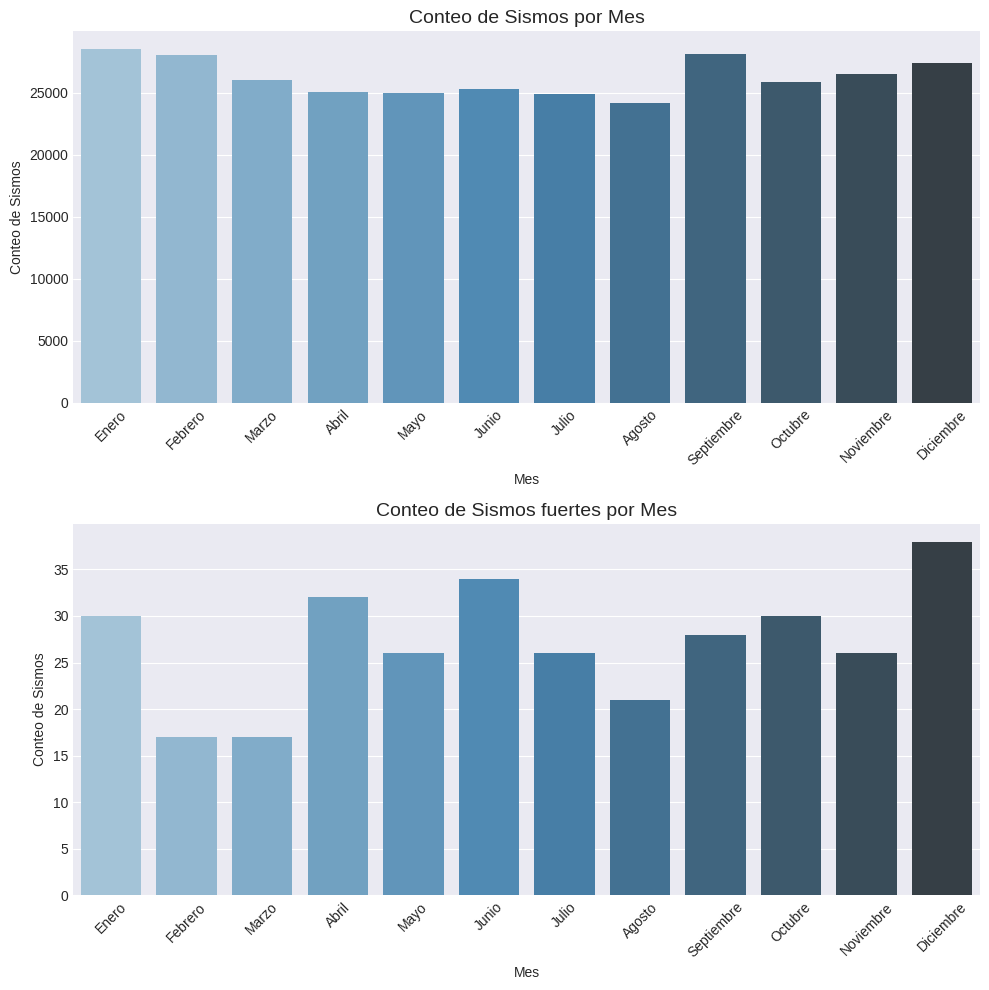

In [26]:
# Graficamos los sismos y sismos fuertes por mes.

# Estilo para el gráfico
plt.style.use('seaborn-darkgrid')  # Estilo elegante
sns.set_palette("muted")           # Colores elegantes

# Creamos la figura y los subplots
fig, axs = plt.subplots(2, 1, figsize=(10, 10))

# Gráfico 1: Conteo de sismos por mes
sns.barplot(x='Mes', y='Conteo_de_Sismos', data=sismos_por_mes, ax=axs[0], palette="Blues_d")
axs[0].set_title('Conteo de Sismos por Mes', fontsize=14)
axs[0].set_xlabel('Mes')
axs[0].set_ylabel('Conteo de Sismos')
axs[0].tick_params(axis='x', rotation=45)

## Gráfico 2: Conteo de sismos fuertes por mes
sns.barplot(x='Mes', y='Conteo_de_Sismos', data=sismos_fuertes_por_mes, ax=axs[1], palette="Blues_d")
axs[1].set_title('Conteo de Sismos fuertes por Mes', fontsize=14)
axs[1].set_xlabel('Mes')
axs[1].set_ylabel('Conteo de Sismos')
axs[1].tick_params(axis='x', rotation=45)

plt.tight_layout()

plt.show()

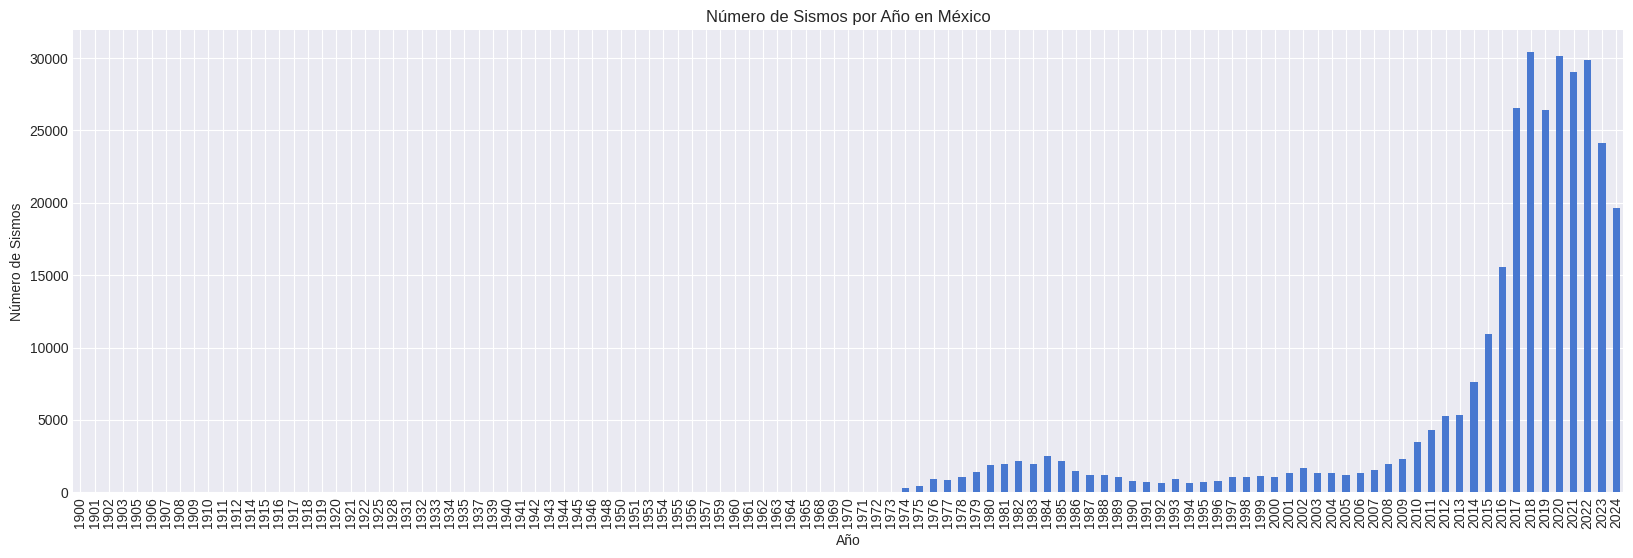

In [28]:
# Contamos la cantidad de sismos por año
sismos_por_anio = sismos_df.groupby('Años').size()

# Graficamos los resultados
sismos_por_anio
plt.figure(figsize=(20, 6))
sismos_por_anio.plot(kind='bar')
plt.title('Número de Sismos por Año en México')
plt.xlabel('Año')
plt.ylabel('Número de Sismos')
plt.show()

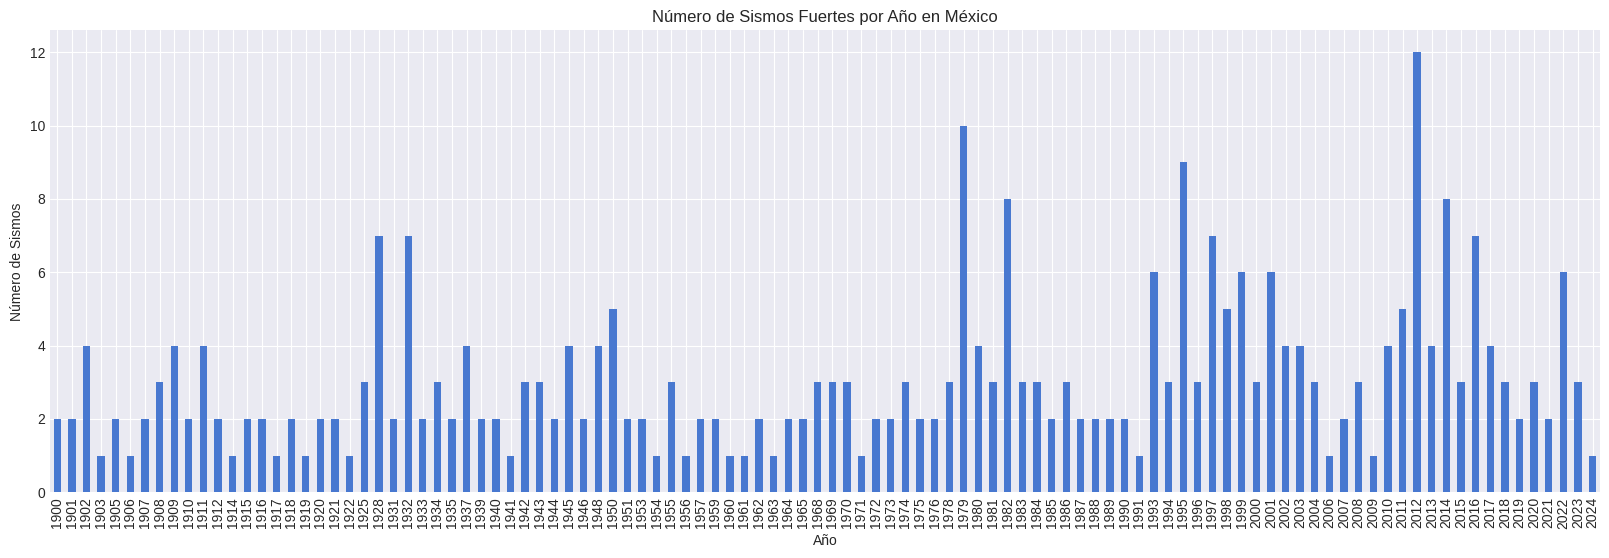

In [29]:
# Contamos la cantidad de sismos fuertes por año
sismos_fuertes_por_anio = sismos_fuertes.groupby('Años').size()

# Mostramos los resultados
sismos_fuertes_por_anio
plt.figure(figsize=(20, 6))
sismos_fuertes_por_anio.plot(kind='bar')
plt.title('Número de Sismos Fuertes por Año en México')
plt.xlabel('Año')
plt.ylabel('Número de Sismos')
plt.show()

<ipython-input-30-4bc59ea802f8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


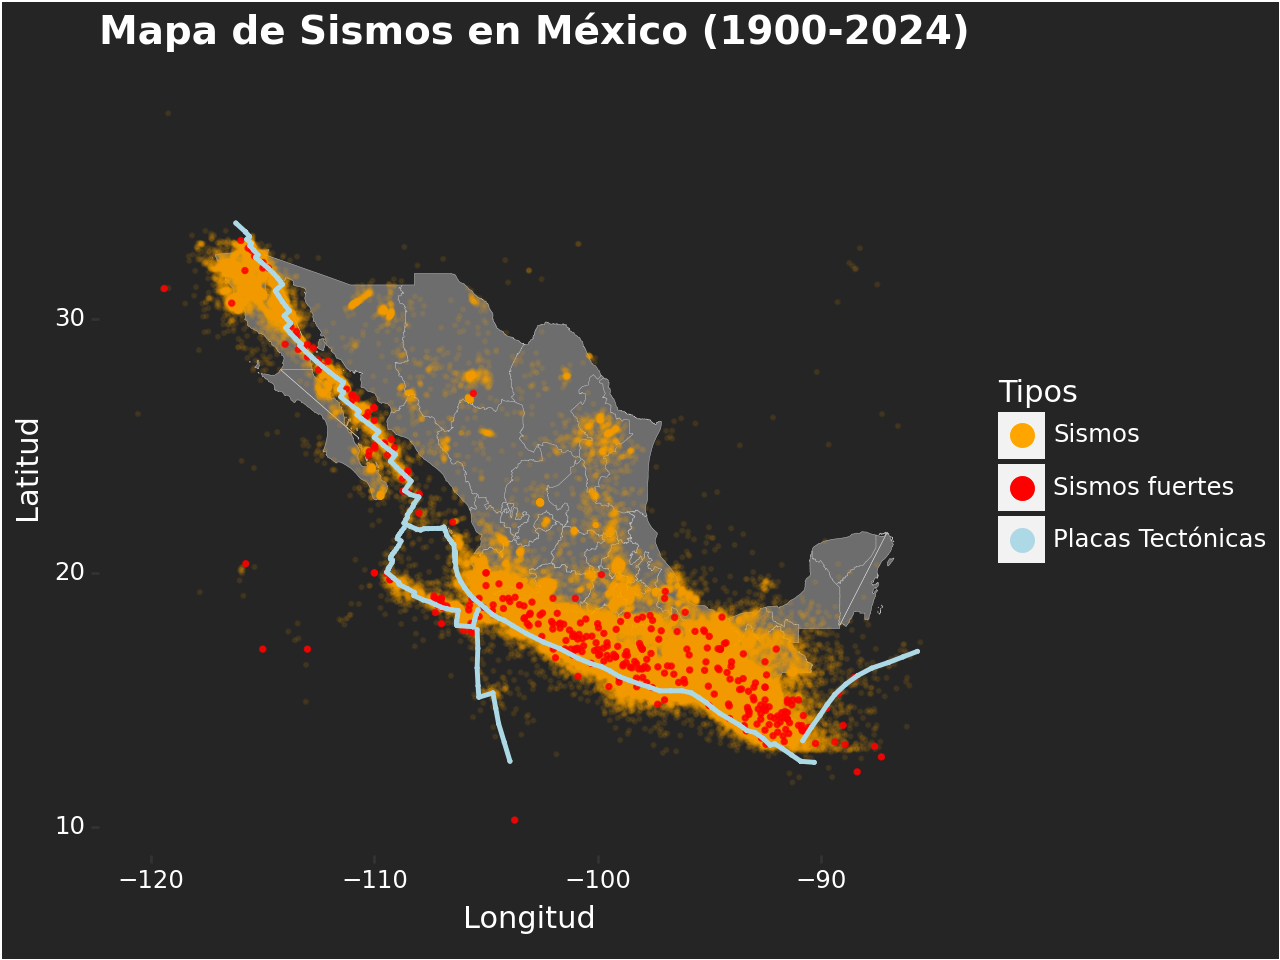

<Figure Size: (640 x 480)>

In [30]:
# Graficamos el mapa de la republica mexicana, las placas tectonicas, los sismos y sismos fuertes.
sismos_df['Tipos'] = 'Sismos'
sismos_fuertes['Tipos'] = 'Sismos fuertes'
placas['Tipos'] = 'Placas Tectónicas'

# Generamos el gráfico
(ggplot() +
    # Mapa de México
    geom_polygon(data=mapa_mexico,
                 mapping=aes(x="Longitud", y="Latitud", group="Grupo"),
                 fill="#6d6d6d", color="#bcbcbc", size=0.1) +

    # Puntos de sismos regulares
    geom_point(data=sismos_df,
               mapping=aes(x="Longitud", y="Latitud", color='Tipos'),
               alpha=0.08, size=0.3) +

    # Puntos de sismos fuertes
    geom_point(data=sismos_fuertes,
               mapping=aes(x="Longitud", y="Latitud", color='Tipos'),
               alpha=0.8, size=0.5) +

    # Líneas de placas tectónicas
    geom_path(data=placas,
              mapping=aes(x="Longitud", y="Latitud", group="Tipo", color='Tipos'),
              size=1) +
    # Puntos de placas tectónicas
    geom_point(data=placas,
              mapping=aes(x="Longitud", y="Latitud", group="Tipo", color='Tipos'),
              size=0.01) +

    labs(title="Mapa de Sismos en México (1900-2024)",
         x="Longitud", y="Latitud") +

    # Modificamos la leyenda para incluir los colores correctos
    scale_color_manual(values={'Sismos': 'orange', 'Sismos fuertes': 'red', 'Placas Tectónicas': '#ADD8E6'},
                       guide=guide_legend(override_aes={'linetype': 'none', 'size': 4}))+

    # Estilos adicionales
     theme(panel_background=element_rect(fill="#252525"), # Fondo oscuro
          panel_grid_major=element_blank(),
          panel_grid_minor=element_blank(),
          axis_text=element_text(color="white"), # Texto en blanco
          axis_title=element_text(color="white"),
          plot_title=element_text(color="white", size=14, face="bold"),  # Título en blanco y grande
          plot_subtitle=element_text(color="white", size=10),  # Subtítulo en blanco y pequeño
          legend_background=element_rect(fill="#252525"),  # Fondo oscuro de la leyenda
          legend_title=element_text(color="white"),  # Título de la leyenda en blanco
          legend_text=element_text(color="white"),  # Texto de la leyenda en blanco
          plot_background=element_rect(fill="#252525"), # Fondo del plot
          legend_position="right")   # Posición de la leyenda
)

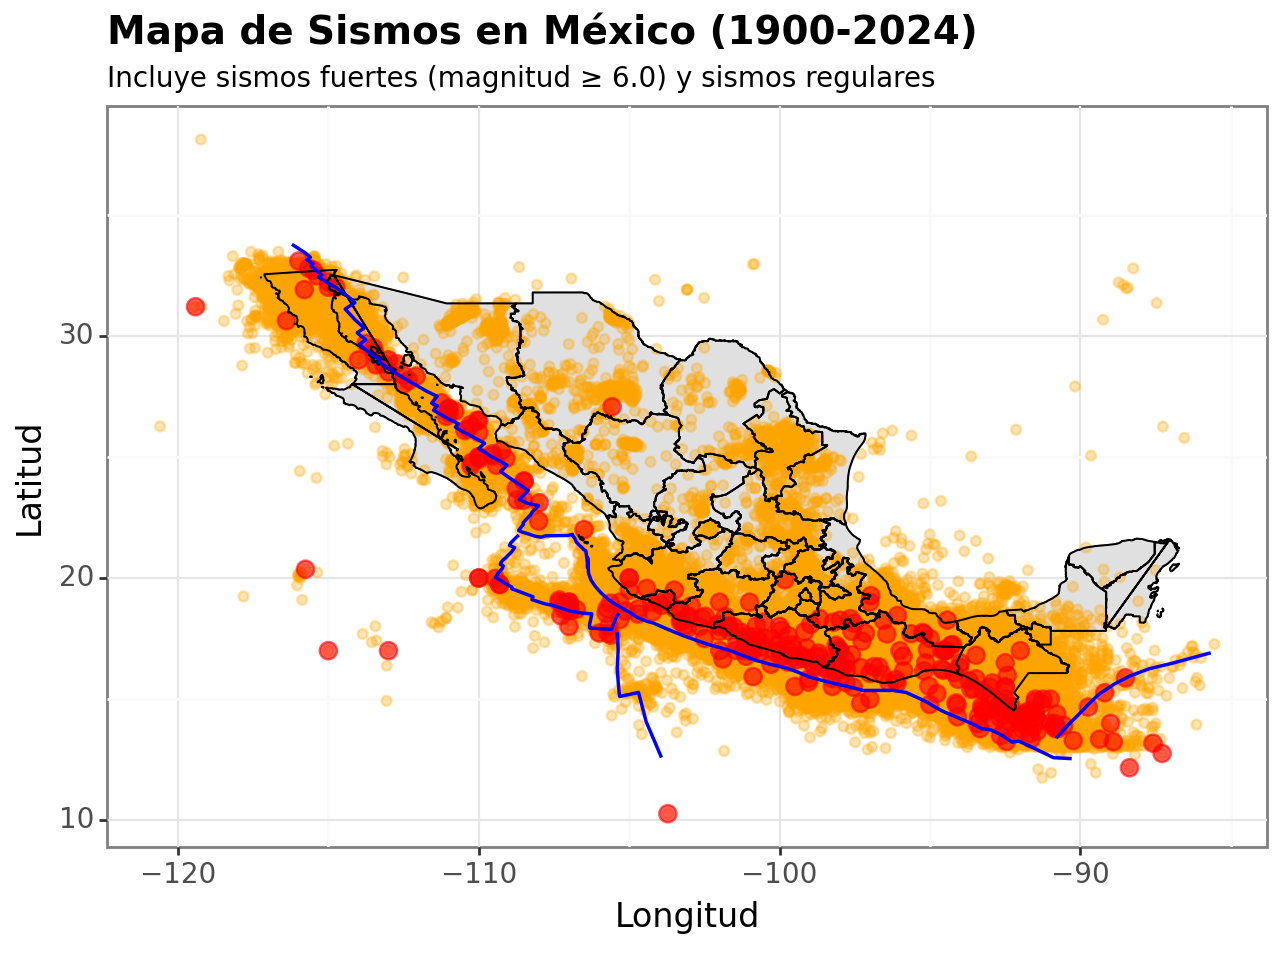

<Figure Size: (640 x 480)>

In [31]:
# Mapa opcional

(ggplot() +
    # Dibujamos el mapa de México con el contorno del país
    geom_polygon(data=mapa_mexico,
                 mapping=aes(x="Longitud", y="Latitud", group="Grupo"),
                 fill="#e0e0e0",  # Color de fondo del mapa (gris claro)
                 color="#7f7f7f", # Borde de los estados
                 size=0.3) +

    # Puntos para los sismos regulares
    geom_point(data=sismos_df,
               mapping=aes(x="Longitud", y="Latitud"),
               color="orange",   # Color personalizado para sismos regulares
               alpha=0.3,        # Transparencia
               size=1.5,         # Tamaño del punto
               show_legend=True) +

    # Puntos para los sismos fuertes
    geom_point(data=sismos_fuertes,
               mapping=aes(x="Longitud", y="Latitud"),
               color="red",      # Color fuerte para sismos fuertes
               alpha=0.6,        # Mayor opacidad
               size=3,           # Puntos más grandes
               show_legend=True) +

    # Dibujamos de nuevo el borde del mapa, para dar mejor definición al contorno
    geom_polygon(data=mapa_mexico,
                 mapping=aes(x="Longitud", y="Latitud", group="Grupo"),
                 fill=None, color="black", size=0.4) +

    # Dibujamos las placas tectónicas en color azul
    geom_path(data=placas,
              mapping=aes(x="Longitud", y="Latitud", group="Tipo"),
              color="blue", size=0.7) +

    # Personalizamos el fondo del gráfico
    theme_bw() +

    # Agregamos título y etiquetas a los ejes
    labs(title="Mapa de Sismos en México (1900-2024)",
         subtitle="Incluye sismos fuertes (magnitud ≥ 6.0) y sismos regulares",
         x="Longitud", y="Latitud",
         color="Tipo de Sismo") +

    # Ajustamos la leyenda para que sea más clara
    guides(color=guide_legend(title="Sismos",
                              override_aes={"size": [3, 1.5],
                                            "alpha": [0.6, 0.3],
                                            "color": ["red", "orange"]})) +

    # Ajustamos la visualización del tema y fuente
    theme(
        legend_position="right",  # Posición de la leyenda
        plot_title=element_text(size=14, face="bold"),  # Título más grande y en negrita
        plot_subtitle=element_text(size=10),  # Subtítulo más pequeño
        axis_title=element_text(size=12),  # Tamaño de la fuente en ejes
        axis_text=element_text(size=10)  # Tamaño de texto en los valores del eje
    )
)
